In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualizationdf_e.shape
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load the dataset
df_n = pd.read_csv('../data/processed/cleaned_data_Namrata_NAN.csv')
df_e = pd.read_csv('../data/processed/cleaned_data_Emanuela.csv')



In [4]:
df_e[df_e['rent_price'] < 0]

,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,floor,is_floor_under,rent_price,buy_price_by_area,is_renewal_needed,is_new_development,...,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,built_year,neighbourhood,district,house_type
2480,257.0,3,3.0,1,one,0.0,-1755,5739,0,0.0,...,in process,1,NaN,NaN,NaN,NaN,NaN,Cuatro Caminos 113,Tetuán 17,Duplex
2497,257.0,3,4.0,1,one,0.0,-1755,5739,0,0.0,...,E,1,NaN,NaN,NaN,NaN,1970.0,Cuatro Caminos 113,Tetuán 17,Penthouse
2498,295.0,4,4.0,1,five,0.0,-303,4746,0,0.0,...,in process,1,NaN,NaN,NaN,NaN,1975.0,Cuzco-Castillejos 114,Tetuán 17,Duplex
2512,257.0,3,4.0,1,one,0.0,-1755,5739,0,0.0,...,in process,1,0.0,0.0,1.0,1.0,NaN,Cuatro Caminos 113,Tetuán 17,Penthouse
2541,203.0,4,4.0,1,one,0.0,-4391,7759,0,0.0,...,C,1,0.0,0.0,0.0,1.0,1967.0,Cuatro Caminos 113,Tetuán 17,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21451,351.0,4,5.0,1,NaN,0.0,-103852,7120,0,0.0,...,in process,1,1.0,1.0,1.0,1.0,2018.0,Nueva España 29,Chamartín 5,Chalet
21452,220.0,4,3.0,1,four,0.0,-3649,7045,0,0.0,...,in process,1,NaN,NaN,NaN,NaN,1970.0,El Viso 28,Chamartín 5,Apartment
21453,432.0,2,3.0,1,NaN,0.0,-394913,7523,0,0.0,...,in process,1,NaN,NaN,NaN,NaN,1960.0,El Viso 28,Chamartín 5,Chalet
21456,395.0,4,4.0,1,NaN,0.0,-313261,7848,1,0.0,...,in process,1,0.0,1.0,0.0,1.0,NaN,El Viso 28,Chamartín 5,Chalet


In [5]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Snippets')

from DataFrame_Analysis import analyze_dataframe

In [6]:
# Perform EDA now
#analyze_dataframe(df_e)

In [7]:
df_e.head(10)

,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,floor,is_floor_under,rent_price,buy_price_by_area,is_renewal_needed,is_new_development,...,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,built_year,neighbourhood,district,house_type
0,64.0,2,1.0,0,three,0.0,471,1328,0,0.0,...,D,0,0.0,1.0,0.0,0.0,1960.0,San Cristóbal 135,Villaverde 21,Apartment
1,70.0,3,1.0,1,four,0.0,666,1856,1,0.0,...,in process,0,NaN,NaN,NaN,NaN,NaN,Los Ángeles 132,Villaverde 21,Apartment
2,94.0,2,2.0,0,one,0.0,722,1535,0,0.0,...,not indicated,0,NaN,NaN,NaN,NaN,NaN,San Andrés 134,Villaverde 21,Apartment
3,64.0,2,1.0,1,zero,1.0,583,1717,0,0.0,...,in process,0,0.0,0.0,1.0,0.0,1955.0,San Andrés 134,Villaverde 21,Apartment
4,108.0,2,2.0,1,four,0.0,1094,2407,0,0.0,...,in process,1,1.0,1.0,1.0,1.0,2003.0,Los Rosales 133,Villaverde 21,Apartment
5,126.0,4,2.0,1,three,0.0,901,1548,0,0.0,...,in process,1,0.0,0.0,0.0,1.0,1981.0,San Andrés 134,Villaverde 21,Apartment
6,120.0,5,2.0,1,one,0.0,884,1583,0,0.0,...,F,1,0.0,0.0,1.0,0.0,NaN,San Andrés 134,Villaverde 21,Apartment
7,125.0,3,2.0,1,two,0.0,912,1588,0,0.0,...,not indicated,0,0.0,0.0,1.0,0.0,NaN,San Andrés 134,Villaverde 21,Apartment
8,84.0,3,2.0,1,NaN,NaN,954,2524,0,0.0,...,F,1,NaN,NaN,NaN,NaN,NaN,Butarque 131,Villaverde 21,Apartment
9,85.0,2,1.0,1,seven,0.0,672,1546,1,0.0,...,in process,0,0.0,1.0,0.0,0.0,1950.0,Los Rosales 133,Villaverde 21,Apartment


In [8]:
df_e.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type'],
      dtype='object')

In [9]:
# Correlation heatmap
numeric_cols = df_e.select_dtypes(include=[np.number]).columns#

df_e[numeric_cols].corr()['buy_price_by_area'].sort_values(ascending=False)

buy_price_by_area          1.000000
has_lift                   0.372199
n_bathrooms                0.239030
has_central_heating        0.227927
has_ac                     0.179578
sq_mt_built                0.174842
has_fitted_wardrobes       0.118977
has_parking                0.105790
is_exact_address_hidden    0.061469
is_new_development         0.047179
is_orientation_west        0.033421
n_rooms                    0.032660
is_orientation_east       -0.004768
is_orientation_north      -0.018520
is_orientation_south      -0.032438
is_renewal_needed         -0.036953
built_year                -0.084392
is_exterior               -0.084601
is_floor_under            -0.133991
rent_price                -0.152036
has_individual_heating    -0.227927
Name: buy_price_by_area, dtype: float64

<Axes: xlabel='buy_price_by_area', ylabel='Count'>

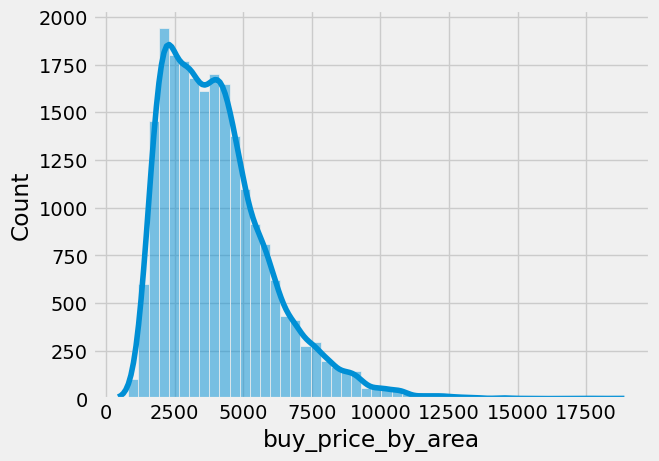

In [10]:
sns.histplot(df_e['buy_price_by_area'],kde = True,bins=50)

In [11]:
# This distribution is skewed - this can be improved to make it more normally distributed

<Axes: xlabel='buy_price_by_area', ylabel='Count'>

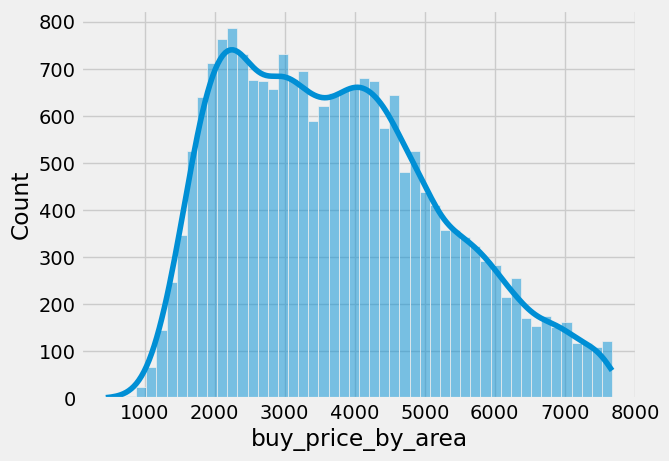

In [12]:
q = df_e['buy_price_by_area'].quantile(0.95)

df_e = df_e[df_e['buy_price_by_area']<q]

sns.histplot(df_e['buy_price_by_area'],kde = True,bins=50)

In [13]:
df_e.isna().sum()

sq_mt_built                  126
n_rooms                        0
n_bathrooms                   16
is_exact_address_hidden        0
floor                       2493
is_floor_under              1116
rent_price                     0
buy_price_by_area              0
is_renewal_needed              0
is_new_development           944
has_central_heating         7594
has_individual_heating      7594
has_ac                         0
has_fitted_wardrobes           0
has_lift                    2286
is_exterior                 2916
energy_certificate             0
has_parking                    0
is_orientation_north        9797
is_orientation_west         9797
is_orientation_south        9797
is_orientation_east         9797
built_year                 10959
neighbourhood                  0
district                       0
house_type                     0
dtype: int64

<Axes: ylabel='built_year'>

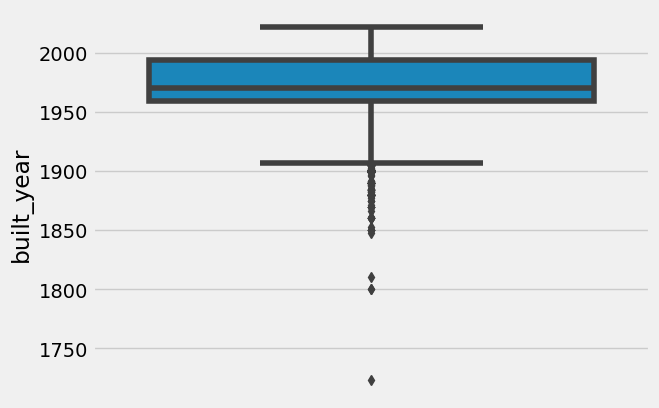

In [14]:
sns.boxplot(y = df_e['built_year'])

In [15]:
df_e.shape

(20441, 26)

In [16]:
# impute built year with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_e['built_year'] = imputer.fit_transform(df_e[['built_year']])


In [17]:
df_e = df_e[df_e['built_year']>1850]

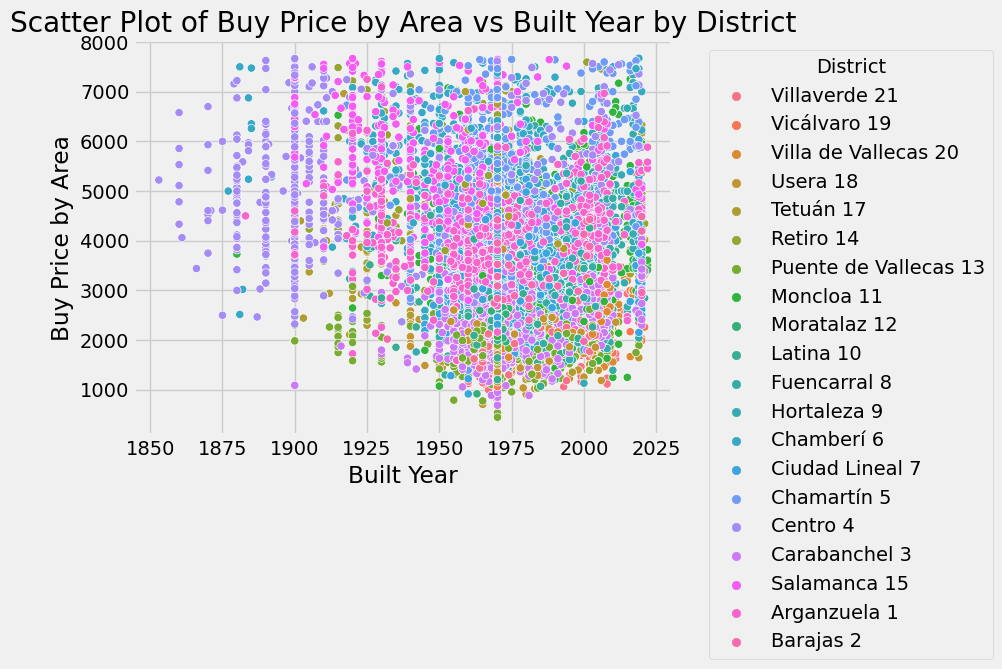

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e, x='built_year', y='buy_price_by_area', hue='district')

# Add labels and title
plt.xlabel('Built Year')
plt.ylabel('Buy Price by Area')
plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [19]:
# One can see some clustering here
# 1. There are areas in a city which are very old 
# 2. Areas with new houses

In [20]:
df_e.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type'],
      dtype='object')

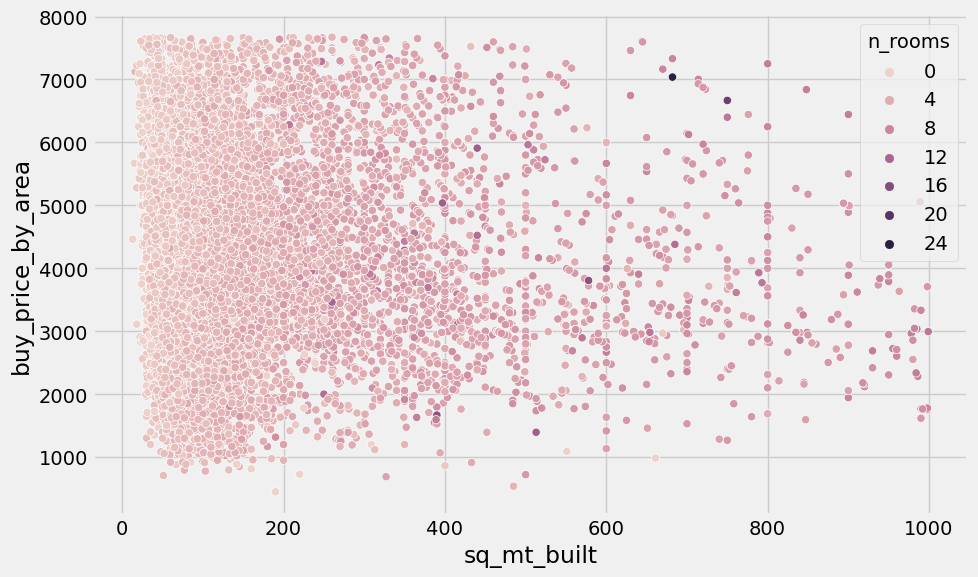

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e, x='sq_mt_built', y='buy_price_by_area', hue = 'n_rooms')

# Add labels and title
#plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
#plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

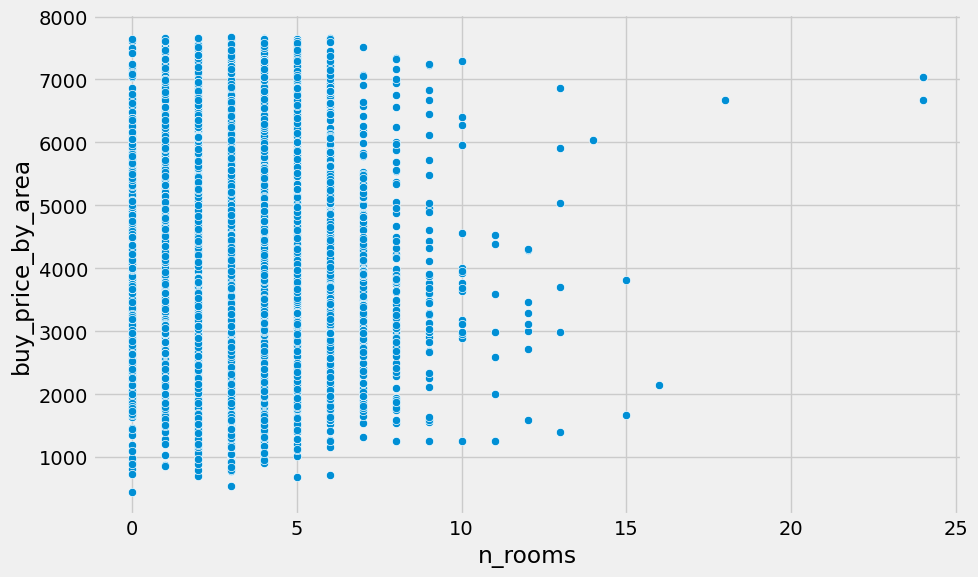

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e, x='n_rooms', y='buy_price_by_area')

# Add labels and title
#plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
#plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

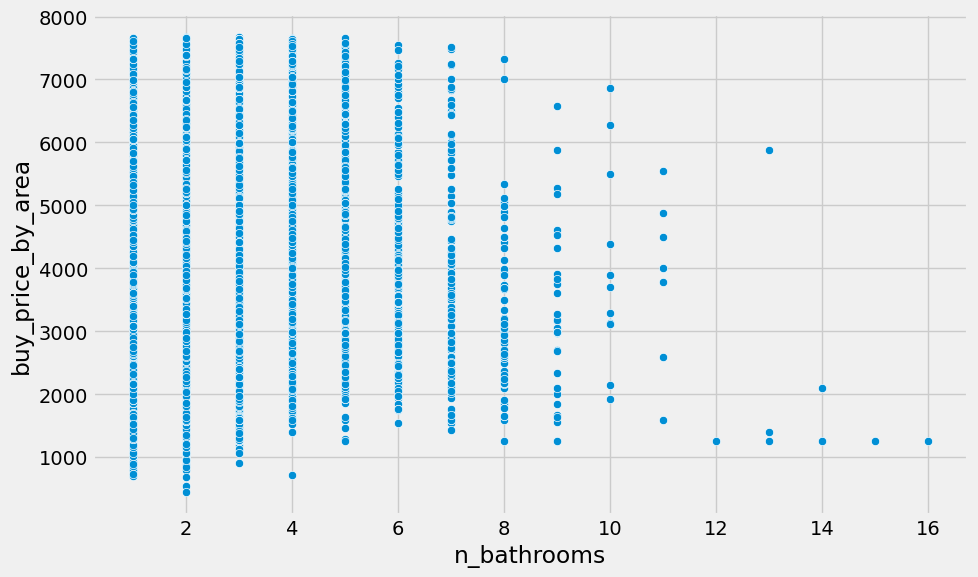

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e, x='n_bathrooms', y='buy_price_by_area')

# Add labels and title
#plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
#plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [24]:
# Divide data into train and test sets
#train_data, test_data = train_test_split(df_e, test_size=0.2, random_state=9)

# Display the shapes of the train and test sets
#print("Train Data Shape:", train_data.shape)
#print("Test Data Shape:", test_data.shape)

In [25]:
df_e.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type'],
      dtype='object')

In [26]:
#conda install -c conda-forge pycaret

In [27]:
from pycaret.regression import *

In [29]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df_e,
    #test_data=test_data,
    target = 'buy_price_by_area',
    session_id=9,
    ignore_features=['rent_price'],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore'
    )

,Description,Value
0,Session id,9
1,Target,buy_price_by_area
2,Target type,Regression
3,Original data shape,"(20429, 26)"
4,Transformed data shape,"(20429, 70)"
5,Transformed train set shape,"(14300, 70)"
6,Transformed test set shape,"(6129, 70)"
7,Ignore features,1
8,Numeric features,19
9,Categorical features,5


In [30]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,465.8755,424038.0072,650.9314,0.8146,0.1783,0.1356,1.3440
lightgbm,Light Gradient Boosting Machine,493.7291,449730.2071,670.4535,0.8032,0.1825,0.1427,0.4810
et,Extra Trees Regressor,475.9988,452409.5196,672.4857,0.8021,0.1837,0.1385,1.4670
gbr,Gradient Boosting Regressor,536.2092,520024.9122,720.9547,0.7725,0.1954,0.1552,0.5490
ridge,Ridge Regression,569.9652,576903.3352,759.3958,0.7476,0.2104,0.1661,0.1560
br,Bayesian Ridge,569.7000,576949.4276,759.4226,0.7476,0.2101,0.1659,0.1810
lasso,Lasso Regression,569.7501,577506.7130,759.7886,0.7474,0.2099,0.1657,0.3140
llar,Lasso Least Angle Regression,569.7450,577491.1376,759.7784,0.7474,0.2099,0.1657,0.1580
huber,Huber Regressor,564.6179,581885.6722,762.6330,0.7455,0.2073,0.1616,0.2370
par,Passive Aggressive Regressor,577.5253,607260.8400,779.0328,0.7344,0.2118,0.1654,0.1730


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [31]:
# predict on test set
holdout_pred = predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,471.7807,437104.1977,661.1386,0.8128,0.1813,0.1380


In [32]:
# show predictions df
holdout_pred[['buy_price_by_area','prediction_label']].head()

,buy_price_by_area,prediction_label
6819,3333,4366.02
5328,2286,2139.50
10786,6304,3896.57
7052,3184,2919.87
2715,3244,3607.33


In [ ]:
predictions = predict_model(final_best_model)

In [ ]:
predictions[['buy_price_by_area','prediction_label']].head()

In [ ]:
# plot residuals
plot_model(best_model, plot = 'residuals')#

In [ ]:
# plot error
plot_model(best_model, plot = 'error')

In [ ]:
# plot feature importance
plot_model(best_model, plot = 'feature')

## Dataset - Namrata

In [ ]:
df_n.columns

In [ ]:
# Correlation heatmap
numeric_cols = df_n.select_dtypes(include=[np.number]).columns#

df_n[numeric_cols].corr()['buy_price_by_area'].sort_values(ascending=False)

In [ ]:
sns.histplot(df_n['buy_price_by_area'],kde = True,bins=50)

In [ ]:
# This distribution is skewed - this can be improved to make it more normally distributed

In [ ]:
q = df_n['buy_price_by_area'].quantile(0.95)

df_n = df_n[df_n['buy_price_by_area']<q]

sns.histplot(df_n['buy_price_by_area'],kde = True,bins=50)

In [ ]:
df_n.isna().sum()

In [ ]:
df_n.shape

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_n, x='n_rooms', y='buy_price_by_area')

# Add labels and title
#plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
#plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_n, x='n_bathrooms', y='buy_price_by_area')

# Add labels and title
#plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
#plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Divide data into train and test sets
train_data_n, test_data_n = train_test_split(df_n, test_size=0.2, random_state=19)

# Display the shapes of the train and test sets
print("Train Data Shape:", train_data_n.shape)
print("Test Data Shape:", test_data_n.shape)

In [ ]:
#conda install -c conda-forge pycaret

In [ ]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=train_data_n,
    target = 'buy_price_by_area',
    session_id=19,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore'
    )

In [ ]:
# compare baseline models
best_model_ = compare_models()

In [ ]:
predictions_ = predict_model(best_model_, data=test_data_n)



In [ ]:
predictions[['buy_price_by_area','prediction_label']].head()

In [ ]:
# Print the predictions
print(predictions[['buy_price_by_area', 'prediction_label']])

# Extract the actual and predicted values
actual_values = test_data_n['buy_price_by_area']
predicted_values = predictions_['prediction_label']

# Calculate the R2 score
r2 = r2_score(actual_values, predicted_values)

print(f'R2 Score on Test Data: {r2}')

In [ ]:
# plot residuals
plot_model(best_model_, plot = 'residuals')

In [ ]:
# plot error_
plot_model(best_model_, plot = 'error')

In [ ]:
# plot feature importance
plot_model(best_model_, plot = 'feature')